In [1]:
# !pip install gym
# !pip install gym[toy_text]
# !pip install numpy
# !pip install matplotlib
# !pip install tqdm

import gym
import numpy as np

# Frozen Lake Environment with Q-Learning
### We'll need to set up the environment and the Q-table first.
### We then need to define the hyperparameters for the Q-Learning algorithm.

In [2]:
env = gym.make('FrozenLake-v1', is_slippery=False, map_name='4x4')
q_table = np.zeros([env.observation_space.n, env.action_space.n])
gamma = 0.9
alpha = 1
epsilon = 0.25

## We need some functions to help us with the Q-Learning algorithm.
### Here we define the epsilon-greedy policy, which will help us choose the next action (recall last week's workshop).

In [3]:
def choose_action(state):
    #Hint: random action based on epsilon, otherwise greedy action
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q_table[state])
    return action

## The Q-Learning algorithm
# Recall that the Q-Learning algorithm is as follows:
# $Q^{new}(s_t,a_t) \leftarrow Q^{current}(s_t, a_t) + \alpha \times (r_t + \gamma \times argmax(Q^{current}(s_{t+1}, a)) - Q^{current}(s_t, a_t))$

In [4]:
def update_q_table(state, action, reward, next_state):
    #Implement the Q-Learning algorithm
    q_table[state, action] = ((1 - alpha) * q_table[state, action]) + (alpha * (reward + gamma * np.max(q_table[next_state])))

In [5]:
def play():
    state = env.reset()
    total_reward = 0
    while True:
        # env.render()
        action = choose_action(state)
        next_state, reward, done, info = env.step(action)
        update_q_table(state, action, reward, next_state)
        state = next_state
        total_reward += reward
        if done:
            break
    return total_reward

In [6]:
import tqdm
all_rewards = []
for i in tqdm.tqdm(range(10000)):
    total_reward = play()
    all_rewards.append(total_reward)
    # print('Episode: {}, Total Reward: {}'.format(i, total_reward))

100%|██████████| 10000/10000 [00:02<00:00, 3716.45it/s]


In [7]:
env.render()
env.close()

  (Right)
SFFF
FHFH
FFFH
HFFG


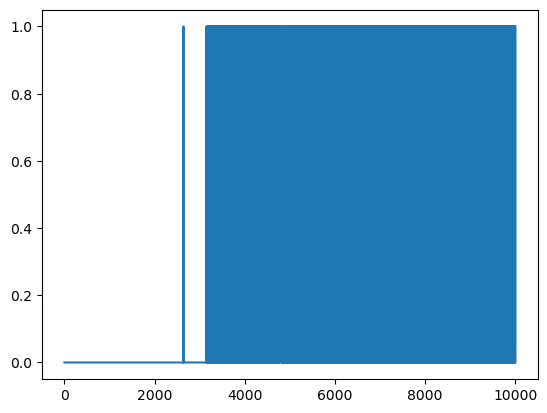

In [8]:
import matplotlib.pyplot as plt
plt.plot(all_rewards)
plt.show()

In [9]:
print(q_table)

[[0.531441 0.59049  0.59049  0.531441]
 [0.531441 0.       0.6561   0.59049 ]
 [0.59049  0.729    0.59049  0.6561  ]
 [0.6561   0.       0.59049  0.59049 ]
 [0.59049  0.6561   0.       0.531441]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.       0.6561  ]
 [0.       0.       0.       0.      ]
 [0.6561   0.       0.729    0.59049 ]
 [0.6561   0.81     0.81     0.      ]
 [0.729    0.9      0.       0.729   ]
 [0.       0.       0.       0.      ]
 [0.       0.       0.       0.      ]
 [0.       0.81     0.9      0.729   ]
 [0.81     0.9      1.       0.81    ]
 [0.       0.       0.       0.      ]]
